In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("./netflix_titles.csv")

# Exploratory data analysis

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# data pre-processing

def check_data():
    print("###Check the type")
    print(df.dtypes)
    
    print("###Check missing values")
    print(df.isnull().sum())
#     print(df.isna().sum())
    
    print("###Generate descriptive statistics")
    print(df.describe().T)
    
    print("###Check duplicate values")
    print(df.duplicated().sum())
    
    
check_data()

###Check the type
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object
###Check missing values
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64
###Generate descriptive statistics
               count         mean       std     min     25%     50%     75%  \
release_year  8807.0  2014.180198  8.819312  1925.0  2013.0  2017.0  2019.0   

                 max  
release_year  2021.0  
###Check duplicate values
0


In [5]:
# remove null values
df.dropna(inplace=True)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5332 non-null   object
 1   type          5332 non-null   object
 2   title         5332 non-null   object
 3   director      5332 non-null   object
 4   cast          5332 non-null   object
 5   country       5332 non-null   object
 6   date_added    5332 non-null   object
 7   release_year  5332 non-null   int64 
 8   rating        5332 non-null   object
 9   duration      5332 non-null   object
 10  listed_in     5332 non-null   object
 11  description   5332 non-null   object
dtypes: int64(1), object(11)
memory usage: 541.5+ KB


In [7]:
# analyse the number of different types
types =  df['type'].value_counts()
types

Movie      5185
TV Show     147
Name: type, dtype: int64

In [8]:

top_10_directors_movie = df['director'][df['type'] == 'Movie'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top_10_directors_movie

,index,director
0,"Raúl Campos, Jan Suter",18
1,Marcus Raboy,14
2,Jay Karas,14
3,Cathy Garcia-Molina,13
4,Jay Chapman,12
5,Youssef Chahine,12
6,Martin Scorsese,12
7,Steven Spielberg,11
8,Don Michael Paul,10
9,David Dhawan,9


In [9]:
top_10_directors_TVShow = df['director'][df['type'] == 'TV Show'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top_10_directors_TVShow

,index,director
0,Alastair Fothergill,3
1,Iginio Straffi,2
2,Rob Seidenglanz,2
3,Shin Won-ho,2
4,Stan Lathan,2
5,Simon Frederick,1
6,Daniel Minahan,1
7,Takuya Igarashi,1
8,Ally Pankiw,1
9,Jay Oliva,1


In [10]:
top_10_countries_movie = df['country'][df['type'] == 'Movie'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top_10_countries_movie

,index,country
0,United States,1819
1,India,868
2,United Kingdom,164
3,Canada,104
4,Egypt,90
5,Nigeria,84
6,Spain,84
7,Indonesia,76
8,Turkey,74
9,Japan,73


In [11]:
top_10_countries_TV = df['country'][df['type'] == 'TV Show'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top_10_countries_TV

,index,country
0,United States,27
1,United Kingdom,19
2,Japan,10
3,South Korea,10
4,Spain,7
5,India,7
6,Taiwan,7
7,France,5
8,Turkey,5
9,Thailand,5


In [12]:
# which year added the most movies?

yearly_counts_movie = df['release_year'][df['type'] == 'Movie'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
yearly_counts_movie

,index,release_year
0,2017,640
1,2018,632
2,2016,567
3,2019,495
4,2020,409
5,2015,340
6,2014,234
7,2013,195
8,2012,159
9,2021,146


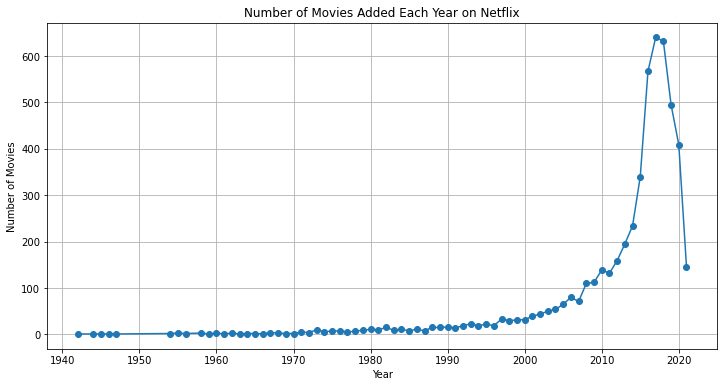

In [13]:
# calculate the number of movie each year
yearly_counts_movie = df[df['type'] == 'Movie'].groupby('release_year').size()

# change data type to interger
yearly_counts_movie.index = yearly_counts_movie.index.map(int)

# sort by year
yearly_counts_movie = yearly_counts_movie.sort_index()

plt.figure(figsize=(12, 6))
yearly_counts_movie.plot(kind='line', marker='o')
plt.title('Number of Movies Added Each Year on Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

In [14]:
# which year added the most TV shows?

yearly_counts_TV = df['release_year'][df['type'] == 'TV Show'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
yearly_counts_TV

,index,release_year
0,2020,33
1,2019,24
2,2017,17
3,2018,16
4,2021,15
5,2016,10
6,2015,9
7,2014,8
8,2012,4
9,2011,3


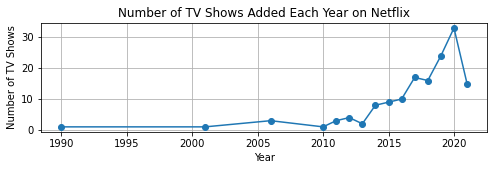

In [15]:
# calculate the number of Tv shows each year
yearly_counts_TV = df[df['type'] == 'TV Show'].groupby('release_year').size()

# change data type to interger
yearly_counts_TV.index = yearly_counts_TV.index.map(int)

# sort by year
yearly_counts_TV = yearly_counts_TV.sort_index()

plt.figure(figsize=(8, 2))
yearly_counts_TV.plot(kind='line', marker='o')
plt.title('Number of TV Shows Added Each Year on Netflix')
plt.xlabel('Year')
plt.ylabel('Number of TV Shows')
plt.grid(True)
plt.show()

In [16]:
listed_in =  df['listed_in'].value_counts()
listed_in

Dramas, International Movies                               336
Stand-Up Comedy                                            286
Comedies, Dramas, International Movies                     257
Dramas, Independent Movies, International Movies           243
Children & Family Movies, Comedies                         179
                                                          ... 
Comedies, Documentaries                                      1
International TV Shows, Romantic TV Shows, TV Mysteries      1
Horror Movies, International Movies, Sci-Fi & Fantasy        1
Reality TV                                                   1
Cult Movies, Dramas, Thrillers                               1
Name: listed_in, Length: 335, dtype: int64

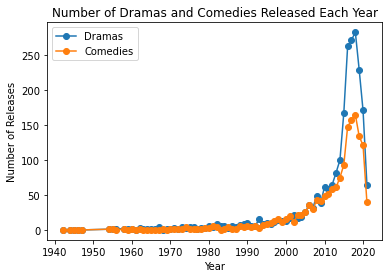

In [17]:
# split listed_in
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(', '))

# explode
df_exploded = df.explode('listed_in')

# 按年份和流派分组，计算每年每个流派的内容数量 
# calculate every list's content in each year
genre_yearly_counts = df_exploded.groupby(['release_year', 'listed_in']).size().reset_index(name='count')

# Pivot表格以年份为行，流派为列，内容数量为值
pivot_table = genre_yearly_counts.pivot(index='release_year', columns='listed_in', values='count').fillna(0)

# 选择一个或几个特定流派进行可视化
pivot_table[['Dramas', 'Comedies']].plot(kind='line', marker='o')
plt.title('Number of Dramas and Comedies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.legend()
plt.show()


# Clustering

In [18]:
df2 = pd.read_csv("./netflix_titles.csv")
df2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [19]:
# Selecting the required attributes
selected_df = df2[['director', 'cast', 'country', 'listed_in', 'description']]

# Display the first few rows of the selected attributes to verify
selected_df.head()

,director,cast,country,listed_in,description
0,Kirsten Johnson,NaN,United States,Documentaries,"As her father nears the end of his life, filmm..."
1,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,NaN,NaN,NaN,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [20]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Function to clean text data
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    return text

# Apply the cleaning function to all text columns
for column in ['director', 'cast', 'country', 'listed_in', 'description']:
    selected_df[column] = selected_df[column].astype(str).apply(clean_text)

# Display the first few rows to verify cleaning and lowercase conversion
selected_df.head()


[nltk_data] Downloading package punkt to /Users/ash/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/ash/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ash/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,director,cast,country,listed_in,description
0,kirsten johnson,nan,united states,documentaries,"as her father nears the end of his life, filmm..."
1,nan,"ama qamata, khosi ngema, gail mabalane, thaban...",south africa,"international tv shows, tv dramas, tv mysteries","after crossing paths at a party, a cape town t..."
2,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",nan,"crime tv shows, international tv shows, tv act...",to protect his family from a powerful drug lor...
3,nan,nan,nan,"docuseries, reality tv","feuds, flirtations and toilet talk go down amo..."
4,nan,"mayur more, jitendra kumar, ranjan raj, alam k...",india,"international tv shows, romantic tv shows, tv ...",in a city of coaching centers known to train i...


In [21]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# English stopwords
stop_words = set(stopwords.words('english'))
selected_df[column] = selected_df[column].apply(lambda x: ' '.join([word for word in word_tokenize(x) if not word in stop_words]))

In [22]:
import string
# !Removing punctuation

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

selected_df[column] = selected_df[column].apply(remove_punctuation)


In [23]:
selected_df[column]

0       father nears end life  filmmaker kirsten johns...
1       crossing paths party  cape town teen sets prov...
2       protect family powerful drug lord  skilled thi...
3       feuds  flirtations toilet talk go among incarc...
4       city coaching centers known train india finest...
                              ...                        
8802    political cartoonist  crime reporter pair cops...
8803    living alone spooky town  young girl befriends...
8804    looking survive world taken zombies  dorky col...
8805    dragged civilian life  former superhero must t...
8806    scrappy poor boy worms way tycoon s dysfunctio...
Name: description, Length: 8807, dtype: object

In [24]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

selected_df[column] = lemmatize_verbs(selected_df[column])

selected_df[column]

0       father nears end life  filmmaker kirsten johns...
1       crossing paths party  cape town teen sets prov...
2       protect family powerful drug lord  skilled thi...
3       feuds  flirtations toilet talk go among incarc...
4       city coaching centers known train india finest...
                              ...                        
8802    political cartoonist  crime reporter pair cops...
8803    living alone spooky town  young girl befriends...
8804    looking survive world taken zombies  dorky col...
8805    dragged civilian life  former superhero must t...
8806    scrappy poor boy worms way tycoon s dysfunctio...
Name: description, Length: 8807, dtype: object

In [25]:
selected_df['tokens'] = selected_df[column].apply(lambda x: word_tokenize(x))
print(selected_df['tokens'].head())

0    [father, nears, end, life, filmmaker, kirsten,...
1    [crossing, paths, party, cape, town, teen, set...
2    [protect, family, powerful, drug, lord, skille...
3    [feuds, flirtations, toilet, talk, go, among, ...
4    [city, coaching, centers, known, train, india,...
Name: tokens, dtype: object


In [26]:
#TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

selected_df['processed_text'] = selected_df['tokens'].apply(lambda x: ' '.join(x))

# Initialise TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Use fit_transform method to learn vocabulary and convert text data into TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(selected_df['processed_text'])

# tfidf_matrix is a sparse matrix that stores the TF-IDF vector of each document
# Get feature names (vocabulary)
feature_names = vectorizer.get_feature_names_out()




In [27]:
feature_names.shape

(20304,)

In [28]:
type(feature_names)

numpy.ndarray

In [29]:
# # dimensaion reduction SVD

# from sklearn.decomposition import TruncatedSVD

# svd = TruncatedSVD(n_components=200)
# reduced_matrix = svd.fit_transform(tfidf_matrix)

# # SVD components (V^T)
# components = svd.components_

# for i, component in enumerate(components):
#     terms_comp = zip(feature_names, component)
#     sorted_terms = sorted(terms_comp, key=lambda x: x[1], reverse=True)[:5]
#     print(f"Topic {i}:")
#     for term in sorted_terms:
#         print(term[0])
#     print(" ")

from sklearn.decomposition import PCA

# convert it to a dense matrix
dense_matrix = tfidf_matrix.toarray()

# Calculate PCA
pca = PCA(n_components=200)
reduced_matrix = pca.fit_transform(dense_matrix)


# get the most relevant words for each principal component by looking at the weight of each principal component and feature
for i in range(len(pca.components_)):
    component = pca.components_[i]
    terms_comp = zip(feature_names, component)
    sorted_terms = sorted(terms_comp, key=lambda x: x[1], reverse=True)[:5]
    print(f"Topic {i}:")
    for term in sorted_terms:
        print(term[0])
    print(" ")



Topic 0:
young
man
woman
love
family
 
Topic 1:
new
school
friends
high
two
 
Topic 2:
life
love
documentary
series
new
 
Topic 3:
new
york
home
life
finds
 
Topic 4:
school
high
student
teen
man
 
Topic 5:
family
home
father
years
friends
 
Topic 6:
world
family
documentary
war
one
 
Topic 7:
life
must
world
save
love
 
Topic 8:
love
world
falls
family
girl
 
Topic 9:
friends
special
standup
comedy
man
 
Topic 10:
man
two
world
one
new
 
Topic 11:
true
friends
man
story
based
 
Topic 12:
woman
one
world
best
friend
 
Topic 13:
true
one
young
two
story
 
Topic 14:
one
must
man
new
save
 
Topic 15:
father
mother
young
boy
three
 
Topic 16:
series
home
find
must
true
 
Topic 17:
one
series
home
father
documentary
 
Topic 18:
father
documentary
must
woman
two
 
Topic 19:
home
back
two
true
story
 
Topic 20:
years
young
home
murder
documentary
 
Topic 21:
find
family
team
series
get
 
Topic 22:
group
find
finds
home
man
 
Topic 23:
finds
girl
must
best
murder
 
Topic 24:
girl
takes
years
b

Text(0, 0.5, 'cumulative explained variance')

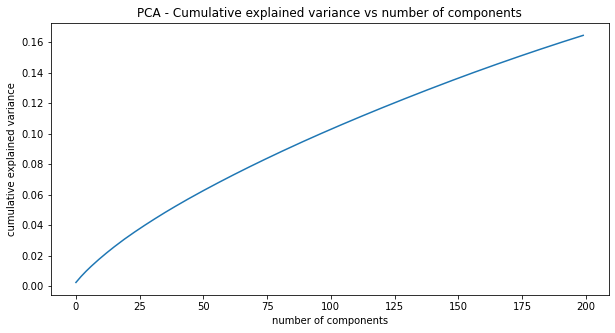

In [30]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [31]:
reduced_matrix.shape

(8807, 200)

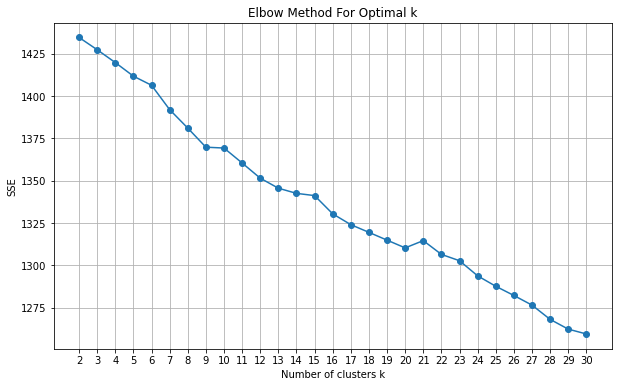

In [32]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

K_range = range(2, 31)

SSE = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_matrix)
    SSE.append(kmeans.inertia_)

# 绘制肘部图
plt.figure(figsize=(10, 6))
plt.plot(K_range, SSE, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters k')
plt.ylabel('SSE')
plt.xticks(K_range)
plt.grid(True)
plt.show()


In [33]:
from sklearn.metrics import silhouette_score

best_score = -1
best_k = 0
for k in range(2, 31): 
    kmeans = KMeans(n_clusters=k, random_state=42).fit(reduced_matrix)
    score = silhouette_score(reduced_matrix, kmeans.labels_)
    print(f"k={k}, Silhouette Coefficient={score}")
    if score > best_score:
        best_score = score
        best_k = k

print(f"Best k is {best_k} with Silhouette Coefficient of {best_score}")


k=2, Silhouette Coefficient=0.0711267280032883
k=3, Silhouette Coefficient=0.06762716384723297
k=4, Silhouette Coefficient=0.060905263426303216
k=5, Silhouette Coefficient=0.05987474921710813
k=6, Silhouette Coefficient=0.055007767323043535
k=7, Silhouette Coefficient=0.05167719059917225
k=8, Silhouette Coefficient=0.04220636362981435
k=9, Silhouette Coefficient=0.04253992833390443
k=10, Silhouette Coefficient=0.042347111315749225
k=11, Silhouette Coefficient=0.04117022090316399
k=12, Silhouette Coefficient=0.036804044802802395
k=13, Silhouette Coefficient=0.032810275825486505
k=14, Silhouette Coefficient=0.03323355567704318
k=15, Silhouette Coefficient=0.02969692450082356
k=16, Silhouette Coefficient=0.028840119578419882
k=17, Silhouette Coefficient=0.029663568256812746
k=18, Silhouette Coefficient=0.028355222440867814
k=19, Silhouette Coefficient=0.02651346053572824
k=20, Silhouette Coefficient=0.027296042276424598
k=21, Silhouette Coefficient=0.011034627433092265
k=22, Silhouette Co

In [34]:
from sklearn.metrics import calinski_harabasz_score

best_score = 0
best_k = 0
for k in range(2, 31):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(reduced_matrix)
    score = calinski_harabasz_score(reduced_matrix, kmeans.labels_)
    print(f"k={k}, Calinski-Harabasz Index={score}")
    if score > best_score:
        best_score = score
        best_k = k

print(f"Best k is {best_k} with Calinski-Harabasz Index of {best_score}")



k=2, Calinski-Harabasz Index=41.52292446945698
k=3, Calinski-Harabasz Index=43.21316944326411
k=4, Calinski-Harabasz Index=44.618081632078194
k=5, Calinski-Harabasz Index=46.16564173834935
k=6, Calinski-Harabasz Index=43.7923515954891
k=7, Calinski-Harabasz Index=52.02713856069475
k=8, Calinski-Harabasz Index=54.87029390596567
k=9, Calinski-Harabasz Index=57.46022855249762
k=10, Calinski-Harabasz Index=51.44206978604295
k=11, Calinski-Harabasz Index=52.30539014847495
k=12, Calinski-Harabasz Index=53.16117921595552
k=13, Calinski-Harabasz Index=52.166840923252884
k=14, Calinski-Harabasz Index=49.79543894564491
k=15, Calinski-Harabasz Index=46.89877351484045
k=16, Calinski-Harabasz Index=48.866339532595894
k=17, Calinski-Harabasz Index=48.67565637814356
k=18, Calinski-Harabasz Index=47.75156235467772
k=19, Calinski-Harabasz Index=46.95472432753599
k=20, Calinski-Harabasz Index=46.248675954868055
k=21, Calinski-Harabasz Index=42.35277204066679
k=22, Calinski-Harabasz Index=43.189126758153

In [39]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9,init='k-means++',random_state=42)
kmeans.fit(reduced_matrix)

labels = kmeans.labels_

cluster_centers = kmeans.cluster_centers_

In [40]:
for i in range(k):
    print(f"Cluster {i} has {np.sum(labels == i)} samples")

Cluster 0 has 138 samples
Cluster 1 has 6571 samples
Cluster 2 has 673 samples
Cluster 3 has 98 samples
Cluster 4 has 99 samples
Cluster 5 has 308 samples
Cluster 6 has 392 samples
Cluster 7 has 197 samples
Cluster 8 has 331 samples
Cluster 9 has 0 samples
Cluster 10 has 0 samples
Cluster 11 has 0 samples
Cluster 12 has 0 samples
Cluster 13 has 0 samples
Cluster 14 has 0 samples
Cluster 15 has 0 samples
Cluster 16 has 0 samples
Cluster 17 has 0 samples
Cluster 18 has 0 samples
Cluster 19 has 0 samples
Cluster 20 has 0 samples
Cluster 21 has 0 samples
Cluster 22 has 0 samples
Cluster 23 has 0 samples
Cluster 24 has 0 samples
Cluster 25 has 0 samples
Cluster 26 has 0 samples
Cluster 27 has 0 samples
Cluster 28 has 0 samples
Cluster 29 has 0 samples


In [41]:
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(reduced_matrix, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(1369.8098923569323, 0.04253992833390443)


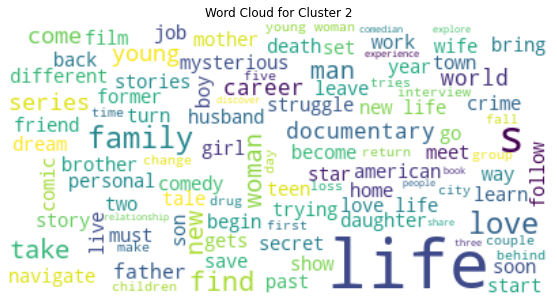

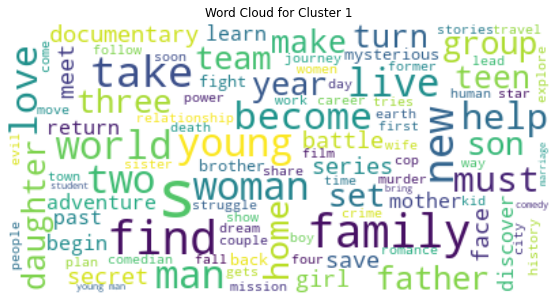

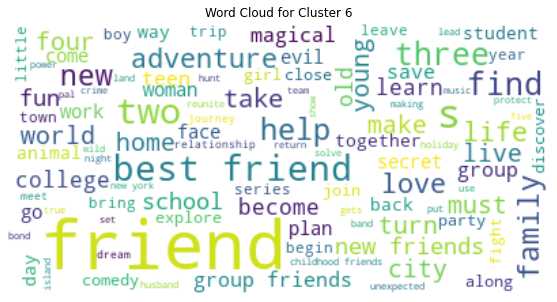

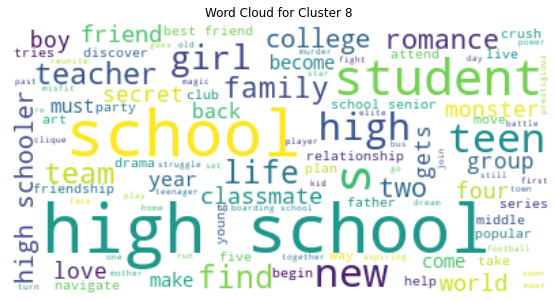

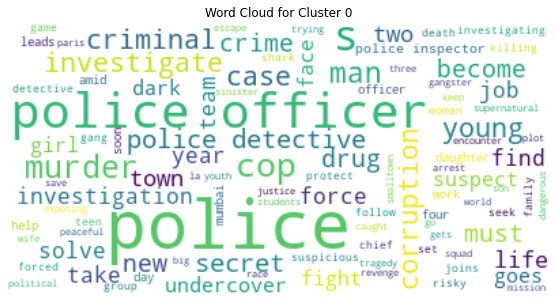

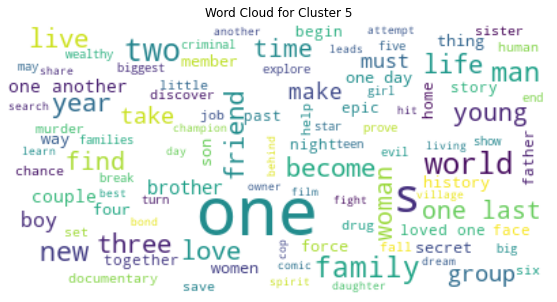

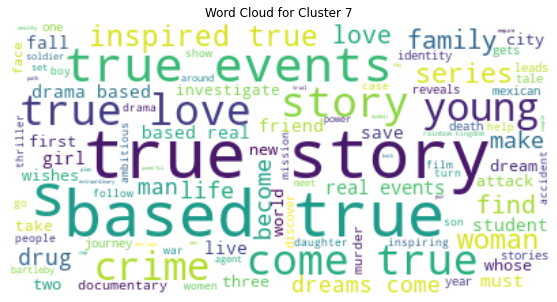

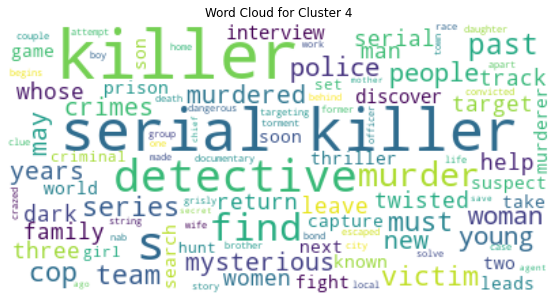

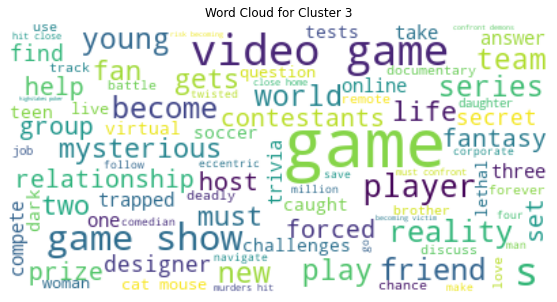

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

original_texts = selected_df[column]

clustered_texts = {}
for label, text in zip(labels, original_texts):
    if label not in clustered_texts:
        clustered_texts[label] = text
    else:
        clustered_texts[label] += ' ' + text


for cluster, text in clustered_texts.items():
    #   Generate a word cloud image
    wordcloud = WordCloud(
        max_font_size=50, 
        max_words=100, 
        background_color="white"
    ).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Cluster {cluster}")
    plt.show()
